In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
# Data Cleaning

data['Age'].fillna(data['Age'].median(), inplace=True)

data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

if 'Cabin' in data.columns:
    data['Cabin_known'] = data['Cabin'].notnull().astype(int)
    data.drop('Cabin', axis=1, inplace=True)
else:
    print("'Cabin' column not found.")

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_known
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


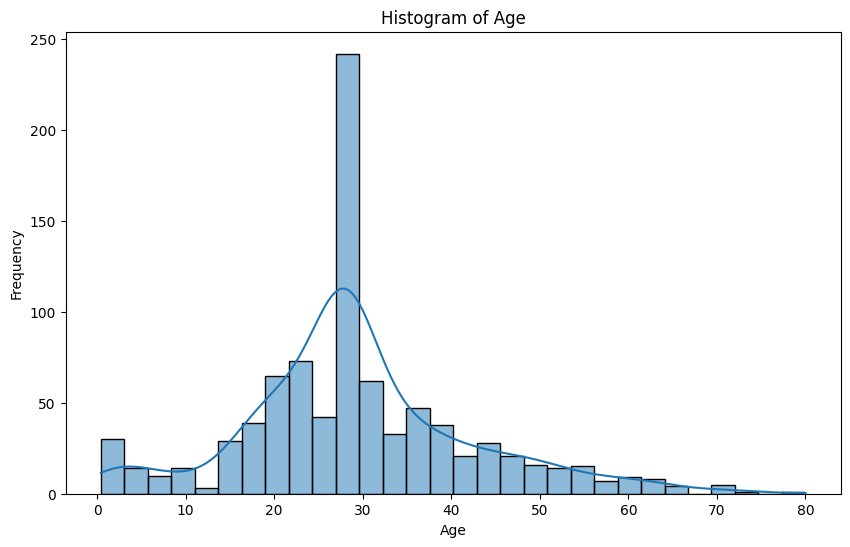

In [8]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', data=data, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

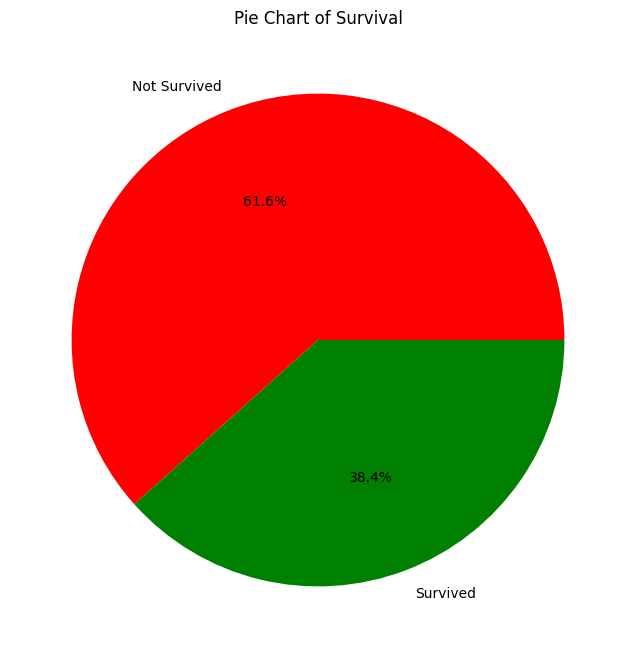

In [9]:
# Pie chart for survival
survived_counts = data['Survived'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Pie Chart of Survival')
plt.show()

<ipython-input-10-9945690a489f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Age', y='Fare', data=data, ci=None, estimator='mean')


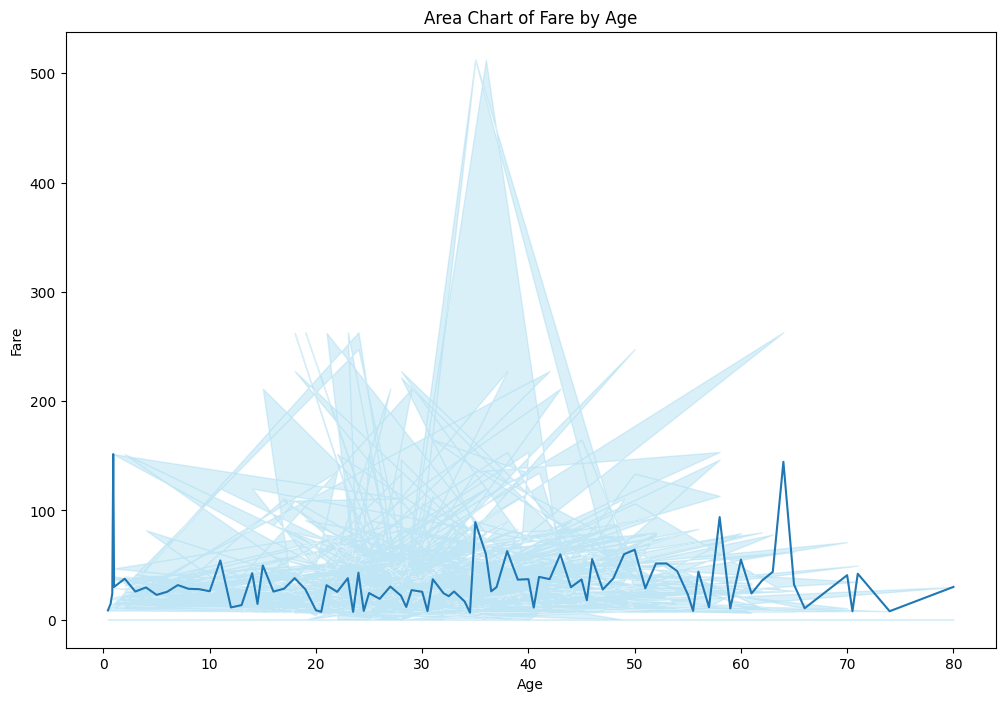

In [10]:
# Area chart for fare by age
plt.figure(figsize=(12, 8))
sns.lineplot(x='Age', y='Fare', data=data, ci=None, estimator='mean')
plt.fill_between(data['Age'], data['Fare'], color='skyblue', alpha=0.3)
plt.title('Area Chart of Fare by Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

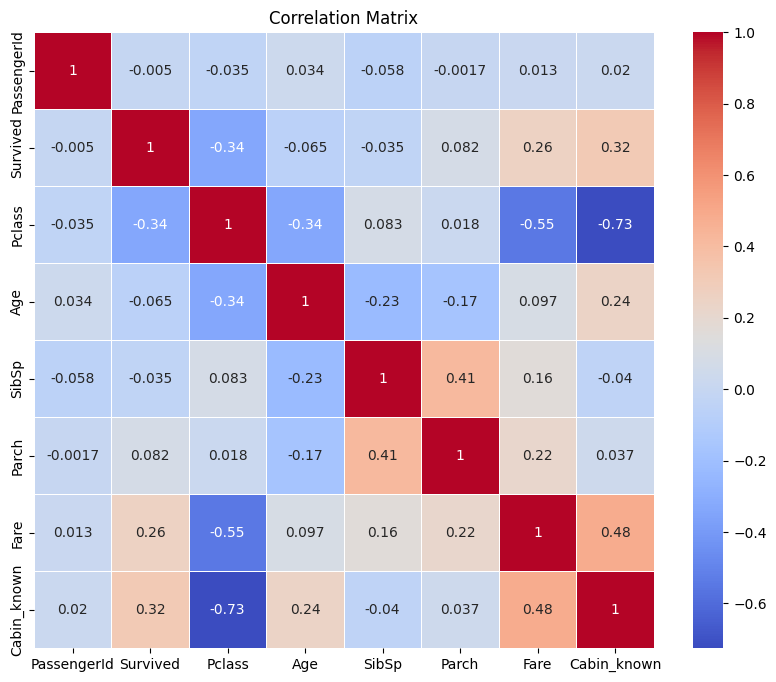

In [18]:
# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])
# Heatmap for correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

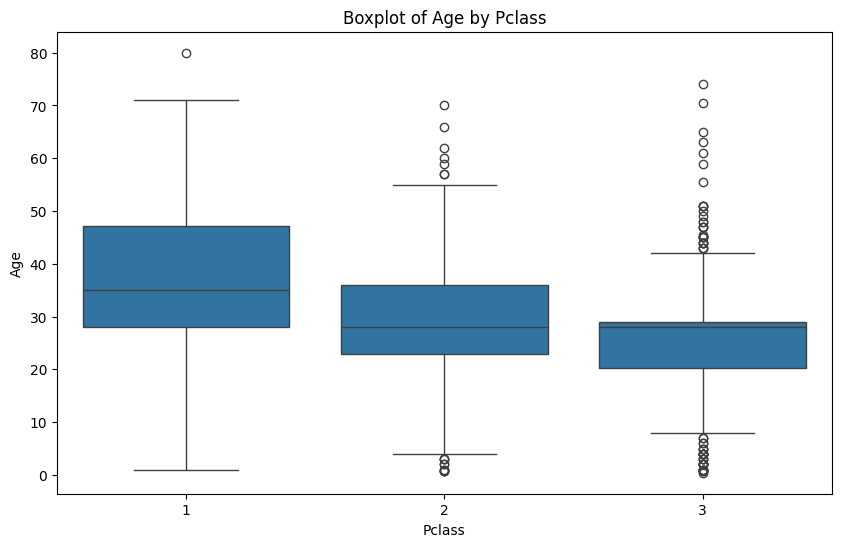

In [12]:
# Boxplot for Age and Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Boxplot of Age by Pclass')
plt.show()

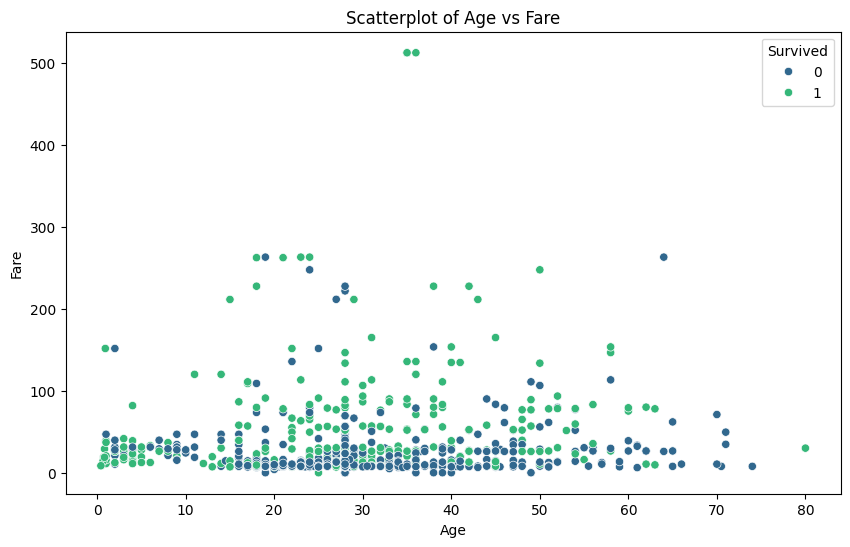

In [13]:
# Scatterplot for Age and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived', palette='viridis')
plt.title('Scatterplot of Age vs Fare')
plt.show()

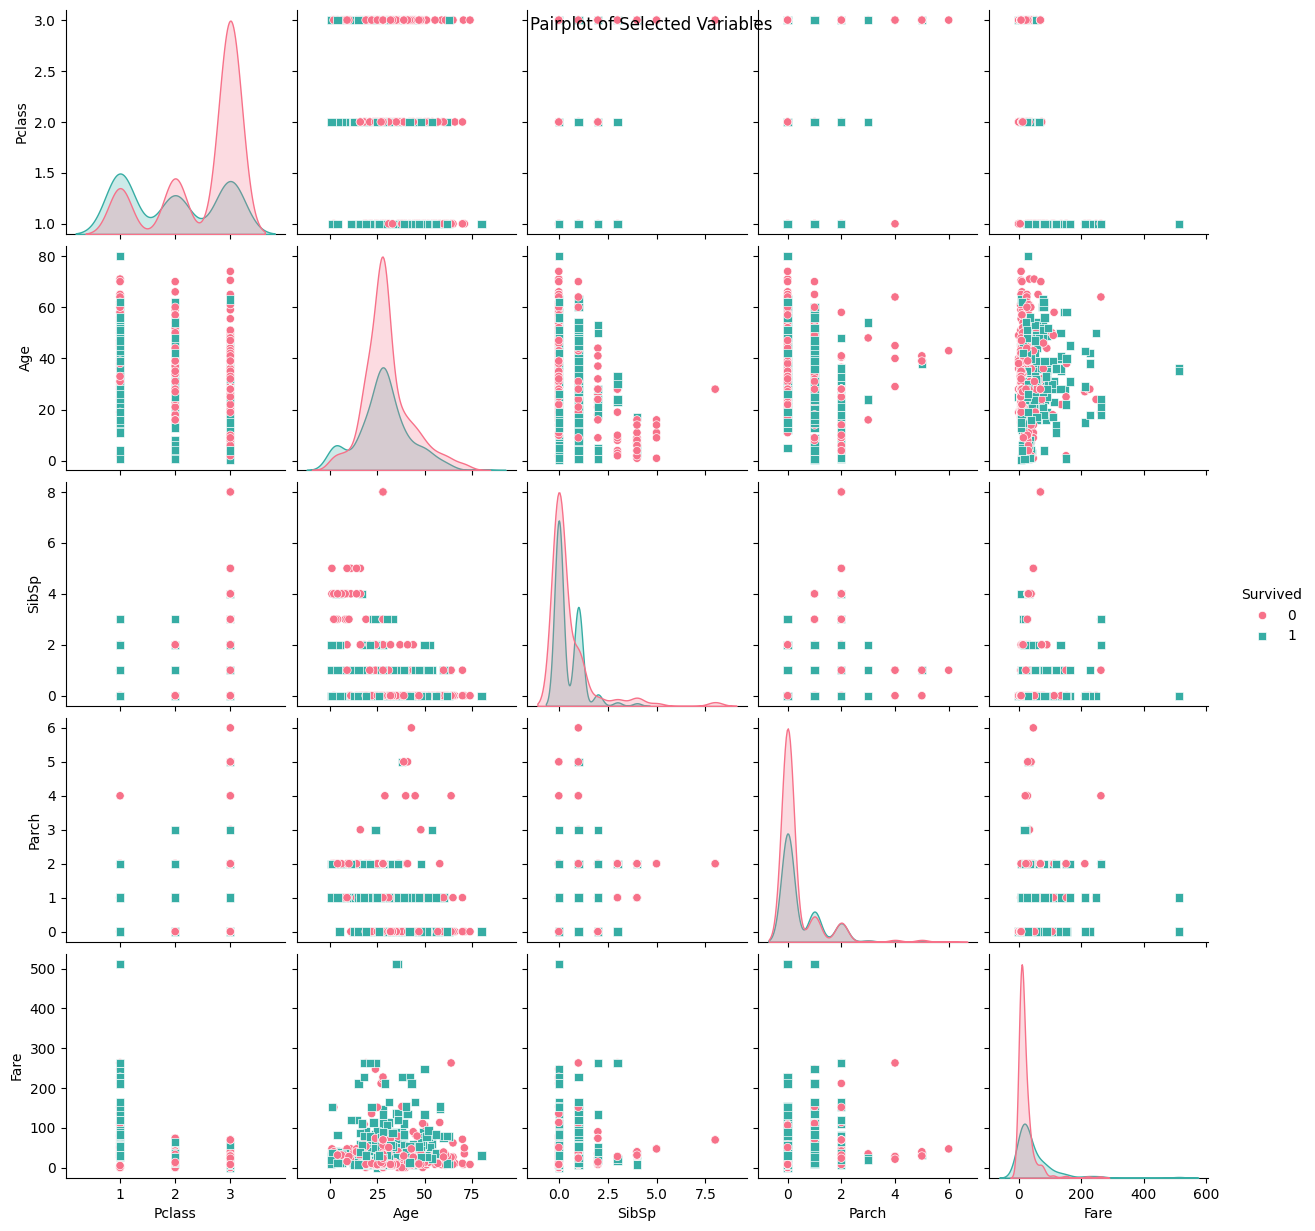

In [14]:
# Pairplot for selected variables
selected_vars = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(data[selected_vars], hue='Survived', palette='husl', markers=['o', 's'])
plt.suptitle('Pairplot of Selected Variables')
plt.show()

In [15]:
# Interactive scatterplot with Plotly Express
fig = px.scatter(data, x='Age', y='Fare', color='Survived', facet_col='Pclass', trendline='ols')
fig.update_layout(title='Interactive Scatterplot of Age vs Fare by Pclass')
fig.show()